# This code contains the correct compilation of old and new Design A experiments individually, the first measurement without MDA (5 pics) to detect changes in intensity values detected, and the total comparison of average bound average between Old Design A, New Design A, Design A* (6 arm/4 bps - 6 bps rec), and 6 arm/4bps - 4 bps rec.

# Read dataframe Separate Experiments 


In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import glob
import pandas as pd
import numpy as np
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

float_epsilon = np.finfo(np.float64).eps
LSQ_PARAMS = dict(method='trf', max_nfev=5000, xtol=float_epsilon, ftol=float_epsilon,
                  gtol=float_epsilon, jac='3-point', x_scale='jac', loss='soft_l1', verbose=1, f_scale = 0.5,
                  tr_options=dict(tr_solver='lsmr', regularize=True))
                  
###Read 6bp##########################
name = 'Separate_Experiments_Edits_Intensity_python.csv' #Insert here other data set to compare
path = 'W:\\staff-bulk\\tnw\\BN\LL\\Shared\\Valentina\\Data_Analysis\\SeparateExperimentsBoundFraction\\'
df_int_nsC = pd.read_csv((os.path.join(path, name)))
df = []

df_int_6nC = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAG']
df_int_6nC = df_int_6nC[df_int_6nC['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6nC = df_int_6nC[df_int_6nC['Number_arms'] == 6]
df_int_6bp_6nC = df_int_6bp_6nC[df_int_6bp_6nC['Sticky_ends'] == 4]

"""
df_int_6nC = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAG']
df_int_6nC = df_int_6nC[df_int_6nC['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6nC = df_int_6nC[df_int_6nC['Number_arms'] == 6]
df_int_6bp_6nC = df_int_6bp_6nC[df_int_6bp_6nC['Sticky_ends'] == 4]
"""


"\ndf_int_6nC = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAG']\ndf_int_6nC = df_int_6nC[df_int_6nC['nanostar_concentration[M]'] == 1.00E-08]\ndf_int_6bp_6nC = df_int_6nC[df_int_6nC['Number_arms'] == 6]\ndf_int_6bp_6nC = df_int_6bp_6nC[df_int_6bp_6nC['Sticky_ends'] == 4]\n"

In [3]:
df_int_6_DA = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAGAA']
df_int_6_DA = df_int_6_DA[df_int_6_DA['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6n_DA = df_int_6_DA[df_int_6_DA['Number_arms'] == 6]
df_int_6bp_6n_DA = df_int_6bp_6n_DA[df_int_6bp_6n_DA['Sticky_ends'] == 6]

In [4]:
df_int_6_DA

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,I_max,I_br,Mean_Intensity_norm_max
29,20231101.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,685.0,862.0,685.0,0.0000
30,20231101.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,736.0,862.0,685.0,0.2880
31,20231101.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,742.0,862.0,685.0,0.3220
32,20231101.0,0.0,6.0,6.0,1.000000e-08,20000.0,GTAGAA,-7.0,766.0,862.0,685.0,0.4580
33,20231101.0,0.0,6.0,6.0,1.000000e-08,50000.0,GTAGAA,-7.0,798.0,862.0,685.0,0.6380
34,20231101.0,0.0,6.0,6.0,1.000000e-08,150000.0,GTAGAA,-7.0,862.0,862.0,685.0,1.0000
35,20231101.0,0.0,6.0,6.0,1.000000e-08,300000.0,GTAGAA,-7.0,832.0,862.0,685.0,0.8310
36,20231110.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,1720.0,4310.0,1720.0,0.0000
37,20231110.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,1830.0,4310.0,1720.0,0.0427
38,20231110.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,2070.0,4310.0,1720.0,0.1370


# Average dataframes

# Add new Design A values here

In [5]:
#Data set 
df_6_6nC = df_int_6bp_6nC.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_6_6nC.columns = ['_'.join(col).strip() for col in df_6_6nC.columns.values]

df_int_6_DA = df_int_6bp_6n_DA.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_int_6_DA.columns = ['_'.join(col).strip() for col in df_int_6_DA.columns.values]


"""######4bp############
df_4_6n = df_int_4bp_6n.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_4_6n.columns = ['_'.join(col).strip() for col in df_4_6n.columns.values]
"""

"######4bp############\ndf_4_6n = df_int_4bp_6n.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()\ndf_4_6n.columns = ['_'.join(col).strip() for col in df_4_6n.columns.values]\n"

In [6]:
df_int_6_DA

,recept_,Mean_Intensity_norm_max_mean,Mean_Intensity_norm_max_std
0,0.0,0.000000,0.000000
1,1000.0,0.304567,0.270531
2,10000.0,0.207333,0.100152
3,20000.0,0.519000,0.313976
4,50000.0,0.879333,0.209001
5,150000.0,0.790667,0.330214
6,300000.0,0.458000,0.326951


C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


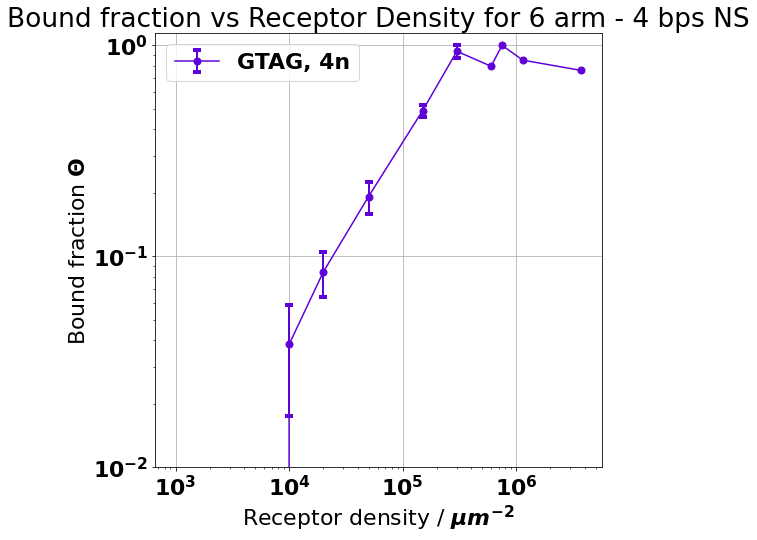

In [7]:
fig = plt.figure(figsize=(8, 8))

plt.errorbar(df_6_6nC.recept_,df_6_6nC.Mean_Intensity_norm_max_mean, yerr=df_6_6nC.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_6nC.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#5f02d9',label = 'GTAG, 4n')
plt.xscale('log')
plt.yscale('log')

plt.title("Bound fraction vs Receptor Density for 6 arm - 4 bps NS")
plt.ylim(1E-2,1.15)
#plt.xlim(900,650000)
plt.xlabel('Receptor density / $\\mu m^{-2}$')
plt.ylabel('Bound fraction $\\Theta$')
plt.grid()
plt.legend()
#name = '6bp_6n_mean_adsorption.png'
#plt.savefig((os.path.join(path, name)), format='png') #this in case I want to export the image as png
plt.show()

# OLD DATA - Design A results 

## Separate experiments are inserted for comparison

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import glob
import pandas as pd
import numpy as np
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

float_epsilon = np.finfo(np.float64).eps
LSQ_PARAMS = dict(method='trf', max_nfev=5000, xtol=float_epsilon, ftol=float_epsilon,
                  gtol=float_epsilon, jac='3-point', x_scale='jac', loss='soft_l1', verbose=1, f_scale = 0.5,
                  tr_options=dict(tr_solver='lsmr', regularize=True))
                  
###Read 6bp##########################
#name = 'Intensity_python.csv'
#path = 'W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\ChristineL\\PhD\\DataAnalysis_aktuell\\Nanostars\\Superselectivity\\'
#df_int_ns = pd.read_csv(os.path.join(path, name))
#df = []

name = 'Intensity_python2.csv'
path = 'W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\ChristineData\\'
df_int_ns = pd.read_csv((os.path.join(path, name)))
df = []



In [9]:
df_int_ns

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
0,20210219,0,3,3,1.000000e-07,0,GTAGAAGTAGG,-17,5.840575e+07,1.000000,1.805149e+09,5.840575e+07,0.000000
1,20210219,0,3,3,1.000000e-07,200,GTAGAAGTAGG,-17,6.334772e+07,1.084614,1.805149e+09,5.840575e+07,0.002829
2,20210219,0,3,3,1.000000e-07,2000,GTAGAAGTAGG,-17,7.912437e+07,1.354736,1.805149e+09,5.840575e+07,0.011861
3,20210219,0,3,3,1.000000e-07,20000,GTAGAAGTAGG,-17,3.538491e+08,6.058463,1.805149e+09,5.840575e+07,0.169140
4,20210219,0,3,3,1.000000e-07,100000,GTAGAAGTAGG,-17,1.287701e+09,22.047501,1.805149e+09,5.840575e+07,0.703764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,20220331,0,6,6,1.000000e-08,10000,ACT,-1,2.463422e+02,1.095982,9.472445e+02,2.247684e+02,0.029861
218,20220331,0,6,6,1.000000e-08,20000,ACT,-1,3.046614e+02,1.355446,9.472445e+02,2.247684e+02,0.110582
219,20220331,0,6,6,1.000000e-08,50000,ACT,-1,4.334876e+02,1.928597,9.472445e+02,2.247684e+02,0.288894
220,20220331,0,6,6,1.000000e-08,150000,ACT,-1,5.667654e+02,2.521553,9.472445e+02,2.247684e+02,0.473368


## Experiment 20210921

In [10]:
df_int_6_1 = df_int_ns[df_int_ns['Stickyend'] == 'ACTTCT']
df_int_6_1 = df_int_6_1[df_int_6_1['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6n_1 = df_int_6_1[df_int_6_1['Number_arms'] == 6]
df_int_6_1 = df_int_6_1[df_int_6_1['Sticky_ends'] == 6]
df_int_6_1 = df_int_6_1[df_int_6_1['date'] == 20210921]

In [11]:
df_int_6_1

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
49,20210921,0,6,6,1.000000e-08,0,ACTTCT,-7,247.7394,1.000000,2263.957,247.7394,0.000000
50,20210921,0,6,6,1.000000e-08,2000,ACTTCT,-7,352.0590,1.421086,2263.957,247.7394,0.051740
51,20210921,0,6,6,1.000000e-08,20000,ACTTCT,-7,1445.3472,5.834143,2263.957,247.7394,0.593987
52,20210921,0,6,6,1.000000e-08,40000,ACTTCT,-7,2146.6552,8.664973,2263.957,247.7394,0.941821
53,20210921,0,6,6,1.000000e-08,100000,ACTTCT,-7,2263.9570,9.138462,2263.957,247.7394,1.000000
54,20210921,0,6,6,1.000000e-08,300000,ACTTCT,-7,2162.6396,8.729494,2263.957,247.7394,0.949749
55,20210921,0,6,6,1.000000e-08,600000,ACTTCT,-7,2052.5658,8.285181,2263.957,247.7394,0.895155


## Experiment 20210922

In [12]:
df_int_6_2 = df_int_ns[df_int_ns['Stickyend'] == 'ACTTCT']
df_int_6_2 = df_int_6_2[df_int_6_2['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_2 = df_int_6_2[df_int_6_2['date'] == 20210922]
df_int_6bp_6n_2 = df_int_6_2[df_int_6_2['Number_arms'] == 6]
df_int_6bp_6n_2 = df_int_6bp_6n_2[df_int_6bp_6n_2['Sticky_ends'] == 6]


In [13]:
df_int_6_2

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
56,20210922,0,6,6,1.000000e-08,0,ACTTCT,-7,244.8652,1.000000,2113.4204,244.8652,0.000000
57,20210922,0,6,6,1.000000e-08,2000,ACTTCT,-7,375.4800,1.533415,2113.4204,244.8652,0.069901
58,20210922,0,6,6,1.000000e-08,6000,ACTTCT,-7,632.0024,2.581022,2113.4204,244.8652,0.207185
59,20210922,0,6,6,1.000000e-08,20000,ACTTCT,-7,1430.0760,5.840258,2113.4204,244.8652,0.634293
60,20210922,0,6,6,1.000000e-08,40000,ACTTCT,-7,1961.9300,8.012286,2113.4204,244.8652,0.918926
61,20210922,0,6,6,1.000000e-08,100000,ACTTCT,-7,1960.8864,8.008024,2113.4204,244.8652,0.918368
62,20210922,0,6,6,1.000000e-08,300000,ACTTCT,-7,2113.4204,8.630955,2113.4204,244.8652,1.000000


In [14]:
df_int_6bp_6n_2

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
56,20210922,0,6,6,1.000000e-08,0,ACTTCT,-7,244.8652,1.000000,2113.4204,244.8652,0.000000
57,20210922,0,6,6,1.000000e-08,2000,ACTTCT,-7,375.4800,1.533415,2113.4204,244.8652,0.069901
58,20210922,0,6,6,1.000000e-08,6000,ACTTCT,-7,632.0024,2.581022,2113.4204,244.8652,0.207185
59,20210922,0,6,6,1.000000e-08,20000,ACTTCT,-7,1430.0760,5.840258,2113.4204,244.8652,0.634293
60,20210922,0,6,6,1.000000e-08,40000,ACTTCT,-7,1961.9300,8.012286,2113.4204,244.8652,0.918926
61,20210922,0,6,6,1.000000e-08,100000,ACTTCT,-7,1960.8864,8.008024,2113.4204,244.8652,0.918368
62,20210922,0,6,6,1.000000e-08,300000,ACTTCT,-7,2113.4204,8.630955,2113.4204,244.8652,1.000000


## Experiment 20210930

In [15]:
df_int_6_3 = df_int_ns[df_int_ns['Stickyend'] == 'ACTTCT']
df_int_6_3 = df_int_6_3[df_int_6_3['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_3 = df_int_6_3[df_int_6_3['date'] == 20210930]
df_int_6_3 = df_int_6_3[df_int_6_3['Inert'] == 0]
df_int_6bp_6n_3 = df_int_6_3[df_int_6_3['Number_arms'] == 6]
df_int_6bp_6n_3 = df_int_6bp_6n_3[df_int_6bp_6n_3['Sticky_ends'] == 6]
df_int_6bp_6n_3 = df_int_6bp_6n_3[df_int_6bp_6n_3['Inert'] == 0]

In [16]:
df_int_6_3

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
77,20210930,0,6,6,1.000000e-08,0,ACTTCT,-7,589.1994,1.000000,10041.2562,589.1994,0.000000
78,20210930,0,6,6,1.000000e-08,1000,ACTTCT,-7,727.5896,1.234878,10041.2562,589.1994,0.014641
79,20210930,0,6,6,1.000000e-08,3000,ACTTCT,-7,1144.3168,1.942155,10041.2562,589.1994,0.058730
80,20210930,0,6,6,1.000000e-08,10000,ACTTCT,-7,2999.4714,5.090758,10041.2562,589.1994,0.255000
81,20210930,0,6,6,1.000000e-08,20000,ACTTCT,-7,5705.1106,9.682818,10041.2562,589.1994,0.541248
82,20210930,0,6,6,1.000000e-08,50000,ACTTCT,-7,10041.2562,17.042204,10041.2562,589.1994,1.000000
83,20210930,0,6,6,1.000000e-08,150000,ACTTCT,-7,7695.2204,13.060469,10041.2562,589.1994,0.751796


## Experiment 20210923

In [17]:
df_int_6_4 = df_int_ns[df_int_ns['Stickyend'] == 'ACTTCT']
df_int_6_4 = df_int_6_4[df_int_6_4['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_4 = df_int_6_4[df_int_6_4['date'] == 20210923]
df_int_6_4 = df_int_6_4[df_int_6_4['Sticky_ends'] == 6]
df_int_6bp_6n_4 = df_int_6_4[df_int_6_4['Number_arms'] == 6]
#df_int_6bp_6n_4 = df_int_6bp_6n_4[df_int_6bp_6n_4['Sticky_ends'] == 6]

In [18]:
df_int_6_4

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
133,20210923,0,6,6,1.000000e-08,0,ACTTCT,-7,341.3962,1.000000,2422.5268,341.3962,0.000000
134,20210923,0,6,6,1.000000e-08,2000,ACTTCT,-7,990.0844,2.900104,2422.5268,341.3962,0.311700
135,20210923,0,6,6,1.000000e-08,6000,ACTTCT,-7,577.1026,1.690419,2422.5268,341.3962,0.113259
136,20210923,0,6,6,1.000000e-08,20000,ACTTCT,-7,1416.7962,4.150006,2422.5268,341.3962,0.516738
137,20210923,0,6,6,1.000000e-08,40000,ACTTCT,-7,2422.5268,7.095940,2422.5268,341.3962,1.000000
138,20210923,0,6,6,1.000000e-08,100000,ACTTCT,-7,2272.7904,6.657339,2422.5268,341.3962,0.928050
139,20210923,0,6,6,1.000000e-08,300000,ACTTCT,-7,1982.5712,5.807244,2422.5268,341.3962,0.788598


# Adding Experiment 1 Design A to compare

In [19]:
name = 'Separate_Experiments_Edits_Intensity_python.csv' #Insert here other data set to compare
path = 'W:\\staff-bulk\\tnw\\BN\LL\\Shared\\Valentina\\Data_Analysis\\SeparateExperimentsBoundFraction\\'

df_int_ns = pd.read_csv((os.path.join(path, name)))
df = []

df_int_6_DA_1 = df_int_ns[df_int_ns['Stickyend'] == 'GTAGAA']
df_int_6_DA_1 = df_int_6_DA_1[df_int_6_DA_1['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_DA_1 = df_int_6_DA_1[df_int_6_DA_1['date'] == 20231101]
df_int_6bp_6n_DA_1 = df_int_6_DA_1[df_int_6_DA_1['Number_arms'] == 6]
df_int_6bp_6n_DA_1 = df_int_6bp_6n_DA_1[df_int_6bp_6n_DA_1['Sticky_ends'] == 6]

In [20]:
df_int_6bp_6n_DA_1

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,I_max,I_br,Mean_Intensity_norm_max
29,20231101.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,685.0,862.0,685.0,0.000
30,20231101.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,736.0,862.0,685.0,0.288
31,20231101.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,742.0,862.0,685.0,0.322
32,20231101.0,0.0,6.0,6.0,1.000000e-08,20000.0,GTAGAA,-7.0,766.0,862.0,685.0,0.458
33,20231101.0,0.0,6.0,6.0,1.000000e-08,50000.0,GTAGAA,-7.0,798.0,862.0,685.0,0.638
34,20231101.0,0.0,6.0,6.0,1.000000e-08,150000.0,GTAGAA,-7.0,862.0,862.0,685.0,1.000
35,20231101.0,0.0,6.0,6.0,1.000000e-08,300000.0,GTAGAA,-7.0,832.0,862.0,685.0,0.831


In [21]:
df_int_6_DA_1

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,I_max,I_br,Mean_Intensity_norm_max
29,20231101.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,685.0,862.0,685.0,0.000
30,20231101.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,736.0,862.0,685.0,0.288
31,20231101.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,742.0,862.0,685.0,0.322
32,20231101.0,0.0,6.0,6.0,1.000000e-08,20000.0,GTAGAA,-7.0,766.0,862.0,685.0,0.458
33,20231101.0,0.0,6.0,6.0,1.000000e-08,50000.0,GTAGAA,-7.0,798.0,862.0,685.0,0.638
34,20231101.0,0.0,6.0,6.0,1.000000e-08,150000.0,GTAGAA,-7.0,862.0,862.0,685.0,1.000
35,20231101.0,0.0,6.0,6.0,1.000000e-08,300000.0,GTAGAA,-7.0,832.0,862.0,685.0,0.831


# Experiment 20231110

In [22]:
df_int_6_DA_2 = df_int_ns[df_int_ns['Stickyend'] == 'GTAGAA']
df_int_6_DA_2 = df_int_6_DA_2[df_int_6_DA_2['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_DA_2 = df_int_6_DA_2[df_int_6_DA_2['date'] == 20231110]
df_int_6bp_6n_DA_2 = df_int_6_DA_2[df_int_6_DA_2['Number_arms'] == 6]
df_int_6bp_6n_DA_2 = df_int_6bp_6n_DA_2[df_int_6bp_6n_DA_2['Sticky_ends'] == 6]

In [23]:
df_int_6_DA_2

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,I_max,I_br,Mean_Intensity_norm_max
36,20231110.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,1720.0,4310.0,1720.0,0.0000
37,20231110.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,1830.0,4310.0,1720.0,0.0427
38,20231110.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,2070.0,4310.0,1720.0,0.1370
39,20231110.0,0.0,6.0,6.0,1.000000e-08,20000.0,GTAGAA,-7.0,2340.0,4310.0,1720.0,0.2400
40,20231110.0,0.0,6.0,6.0,1.000000e-08,50000.0,GTAGAA,-7.0,4310.0,4310.0,1720.0,1.0000
41,20231110.0,0.0,6.0,6.0,1.000000e-08,150000.0,GTAGAA,-7.0,2780.0,4310.0,1720.0,0.4100
42,20231110.0,0.0,6.0,6.0,1.000000e-08,300000.0,GTAGAA,-7.0,2290.0,4310.0,1720.0,0.2210


# Experiment 20231111 = no MDA

In [24]:
df_int_6_DA_3 = df_int_ns[df_int_ns['Stickyend'] == 'GTAGAA']
df_int_6_DA_3 = df_int_6_DA_3[df_int_6_DA_3['nanostar_concentration[M]'] == 1.00E-08]
df_int_6_DA_3 = df_int_6_DA_3[df_int_6_DA_3['date'] == 20231111]
df_int_6bp_6n_DA_3 = df_int_6_DA_3[df_int_6_DA_3['Number_arms'] == 6]
df_int_6bp_6n_DA_3 = df_int_6bp_6n_DA_3[df_int_6bp_6n_DA_3['Sticky_ends'] == 6]

In [25]:
df_int_6_DA_3

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,I_max,I_br,Mean_Intensity_norm_max
43,20231111.0,0.0,6.0,6.0,1.000000e-08,0.0,GTAGAA,-7.0,2070.0,2940.0,2070.0,0.000
44,20231111.0,0.0,6.0,6.0,1.000000e-08,1000.0,GTAGAA,-7.0,2580.0,2940.0,2070.0,0.583
45,20231111.0,0.0,6.0,6.0,1.000000e-08,10000.0,GTAGAA,-7.0,2210.0,2940.0,2070.0,0.163
46,20231111.0,0.0,6.0,6.0,1.000000e-08,20000.0,GTAGAA,-7.0,2820.0,2940.0,2070.0,0.859
47,20231111.0,0.0,6.0,6.0,1.000000e-08,50000.0,GTAGAA,-7.0,2940.0,2940.0,2070.0,1.000
48,20231111.0,0.0,6.0,6.0,1.000000e-08,150000.0,GTAGAA,-7.0,2910.0,2940.0,2070.0,0.962
49,20231111.0,0.0,6.0,6.0,1.000000e-08,300000.0,GTAGAA,-7.0,2350.0,2940.0,2070.0,0.322


# Plot old data 6 arm/6bps per experiment

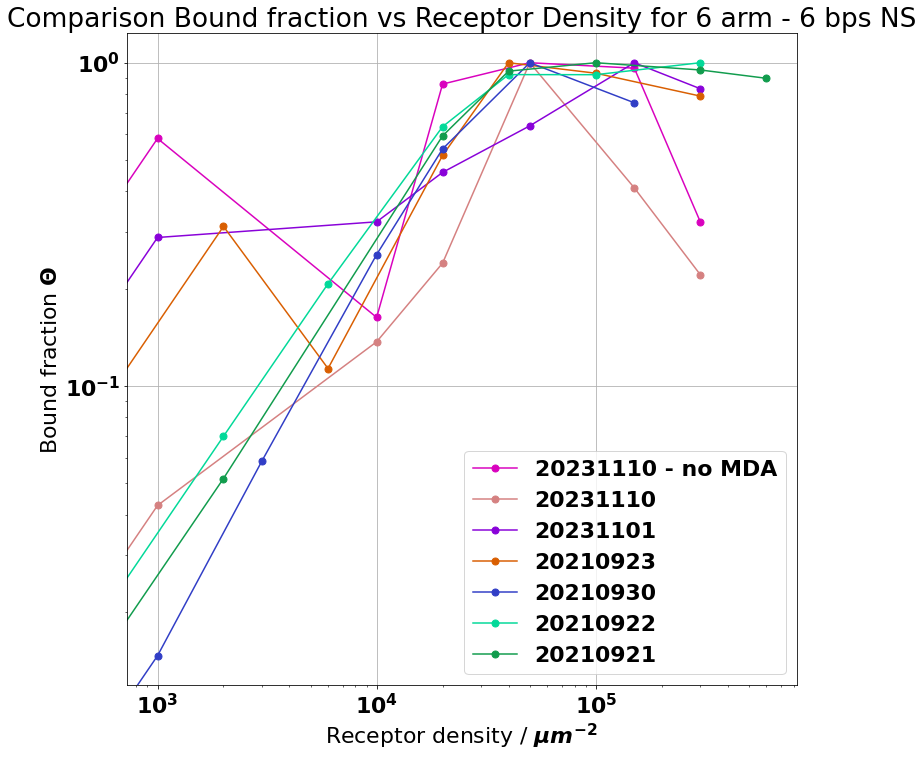

In [29]:
fig = plt.figure(figsize=(12, 12))

#Adding Design A results 

plt.errorbar(df_int_6_DA_3.recept,df_int_6_DA_3.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d902be',label = '20231110 - no MDA')
plt.errorbar(df_int_6_DA_2.recept,df_int_6_DA_2.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d58181',label = '20231110')
plt.errorbar(df_int_6_DA_1.recept,df_int_6_DA_1.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#8902d9',label = '20231101')


#Old Data
plt.errorbar(df_int_6_4.recept,df_int_6_4.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = '20210923')
plt.errorbar(df_int_6_3.recept,df_int_6_3.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#313ec6',label = '20210930')
plt.errorbar(df_int_6bp_6n_2.recept,df_int_6bp_6n_2.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#02d999',label = '20210922')
plt.errorbar(df_int_6_1.recept,df_int_6_1.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#119c4d',label = '20210921')


plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.001,15)
#plt.xlim(10,10000000)
plt.xlabel('Receptor density / $\\mu m^{-2}$')
plt.ylabel('Bound fraction $\\Theta$')
plt.title("Comparison Bound fraction vs Receptor Density for 6 arm - 6 bps NS")
plt.grid()
plt.legend()
#name = '6bp_6n_mean_adsorption.png'
#plt.savefig((os.path.join(path, name)), format='png')
plt.show()

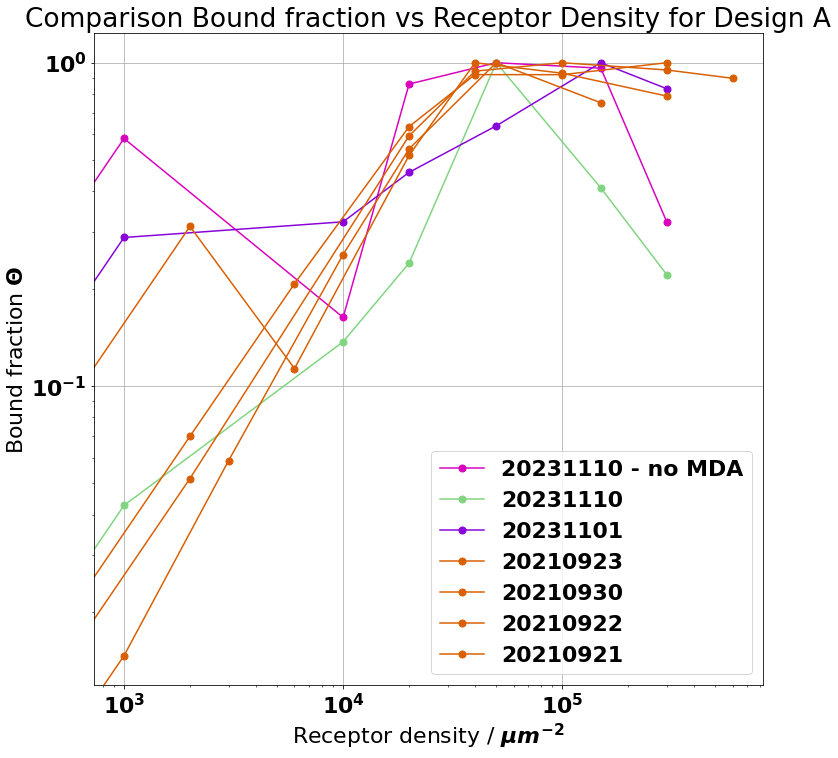

In [28]:
fig = plt.figure(figsize=(12, 12))

#Adding Design A results 

plt.errorbar(df_int_6_DA_3.recept,df_int_6_DA_3.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d902be',label = '20231110 - no MDA')
plt.errorbar(df_int_6_DA_2.recept,df_int_6_DA_2.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#81d581',label = '20231110')
plt.errorbar(df_int_6_DA_1.recept,df_int_6_DA_1.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#8902d9',label = '20231101')


#Old Data
plt.errorbar(df_int_6_4.recept,df_int_6_4.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = '20210923')
plt.errorbar(df_int_6_3.recept,df_int_6_3.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = '20210930')
plt.errorbar(df_int_6bp_6n_2.recept,df_int_6bp_6n_2.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = '20210922')
plt.errorbar(df_int_6_1.recept,df_int_6_1.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = '20210921')


plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.001,15)
#plt.xlim(10,10000000)
plt.xlabel('Receptor density / $\\mu m^{-2}$')
plt.ylabel('Bound fraction $\\Theta$')
plt.title("Comparison Bound fraction vs Receptor Density for Design A")
plt.grid()
plt.legend()
#name = '6bp_6n_mean_adsorption.png'
#plt.savefig((os.path.join(path, name)), format='png')
plt.show()

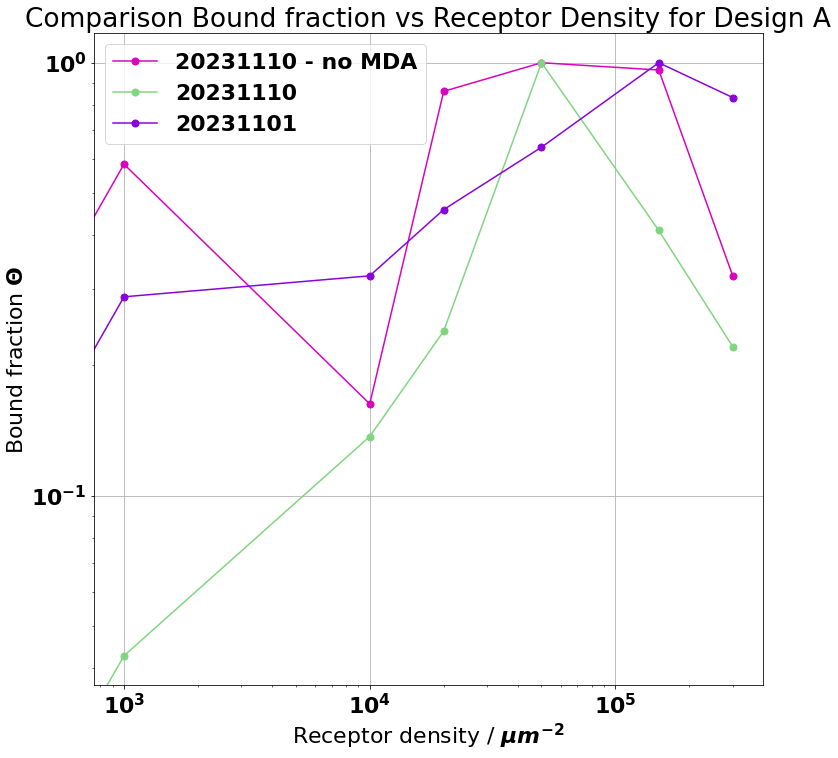

In [30]:
fig = plt.figure(figsize=(12, 12))

#Adding Design A results 

plt.errorbar(df_int_6_DA_3.recept,df_int_6_DA_3.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d902be',label = '20231110 - no MDA')
plt.errorbar(df_int_6_DA_2.recept,df_int_6_DA_2.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#81d581',label = '20231110')
plt.errorbar(df_int_6_DA_1.recept,df_int_6_DA_1.Mean_Intensity_norm_max, fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#8902d9',label = '20231101')


plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.001,15)
#plt.xlim(10,10000000)
plt.xlabel('Receptor density / $\\mu m^{-2}$')
plt.ylabel('Bound fraction $\\Theta$')
plt.title("Comparison Bound fraction vs Receptor Density for Design A")
plt.grid()
plt.legend()
#name = '6bp_6n_mean_adsorption.png'
#plt.savefig((os.path.join(path, name)), format='png')
plt.show()

# Average dataframes 

In [31]:
name = 'Intensity_python2.csv' #new excel file with Christine's data
path = 'W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\ChristineData\\'
df_int_ns = pd.read_csv((os.path.join(path, name)))
df = []


df_int_6 = df_int_ns[df_int_ns['Stickyend'] == 'ACTTCT']
df_int_6 = df_int_6[df_int_6['nanostar_concentration[M]'] == 1.00E-08]
#df_int_6_inert = df_int_6[df_int_6['Inert'] == 1] # a lead into excel file with 6 arm/6bps with 1 inert arm but 6 sticky end value and different number of bps in sticky end receptor
df_int_6 = df_int_6[df_int_6['Inert'] == 0]

df_int_6bp_6n = df_int_6[df_int_6['Number_arms'] == 6]
df_int_6bp_6n = df_int_6bp_6n[df_int_6bp_6n['Sticky_ends'] == 6]



df_int_ns = pd.read_csv((os.path.join(path, name)))
df_int_4 = df_int_ns[df_int_ns['Stickyend'] == 'ACTT']
df_int_4 = df_int_4[df_int_4['nanostar_concentration[M]'] == 1.00E-08]
#df_int_4_inert = df_int_4[df_int_4['Inert'] == 1]
df_int_4 = df_int_4[df_int_4['Inert'] == 0]
df_int_4bp_6n = df_int_4[df_int_4['Sticky_ends'] == 6]
#df_int_4bp_6n_inert = df_int_4_inert[df_int_4_inert['Sticky_ends'] == 6]


In [32]:
#####6bp###########
df_6_6n = df_int_6bp_6n.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_6_6n.columns = ['_'.join(col).strip() for col in df_6_6n.columns.values]

######4bp############
df_4_6n = df_int_4bp_6n.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_4_6n.columns = ['_'.join(col).strip() for col in df_4_6n.columns.values]

In [33]:
df_int_ns

,date,Inert,Number_arms,Sticky_ends,nanostar_concentration[M],recept,Stickyend,GibbsFreeEnergy,Mean_Intensity,Mean_Intensity_norm_min,I_max,I_br,Mean_Intensity_norm_max
0,20210219,0,3,3,1.000000e-07,0,GTAGAAGTAGG,-17,5.840575e+07,1.000000,1.805149e+09,5.840575e+07,0.000000
1,20210219,0,3,3,1.000000e-07,200,GTAGAAGTAGG,-17,6.334772e+07,1.084614,1.805149e+09,5.840575e+07,0.002829
2,20210219,0,3,3,1.000000e-07,2000,GTAGAAGTAGG,-17,7.912437e+07,1.354736,1.805149e+09,5.840575e+07,0.011861
3,20210219,0,3,3,1.000000e-07,20000,GTAGAAGTAGG,-17,3.538491e+08,6.058463,1.805149e+09,5.840575e+07,0.169140
4,20210219,0,3,3,1.000000e-07,100000,GTAGAAGTAGG,-17,1.287701e+09,22.047501,1.805149e+09,5.840575e+07,0.703764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,20220331,0,6,6,1.000000e-08,10000,ACT,-1,2.463422e+02,1.095982,9.472445e+02,2.247684e+02,0.029861
218,20220331,0,6,6,1.000000e-08,20000,ACT,-1,3.046614e+02,1.355446,9.472445e+02,2.247684e+02,0.110582
219,20220331,0,6,6,1.000000e-08,50000,ACT,-1,4.334876e+02,1.928597,9.472445e+02,2.247684e+02,0.288894
220,20220331,0,6,6,1.000000e-08,150000,ACT,-1,5.667654e+02,2.521553,9.472445e+02,2.247684e+02,0.473368


# Plot bound fraction vs receptor density Linne 6 arm/6 bp & 6 arm/6 bp vs my data

In [34]:
                  
###Read 6bp##########################
name = 'Separate_Experiments_Edits_Intensity_python.csv' #Insert here other data set to compare
path = 'W:\\staff-bulk\\tnw\\BN\LL\\Shared\\Valentina\\Data_Analysis\\AlphaFitChanges\\'
df_int_nsC = pd.read_csv((os.path.join(path, name)))
df = []

#this are 6arm/4bps NS 2022
df_int_6nC = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAG']
df_int_6nC = df_int_6nC[df_int_6nC['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6nC = df_int_6nC[df_int_6nC['Number_arms'] == 6]
df_int_6bp_6nC = df_int_6bp_6nC[df_int_6bp_6nC['Sticky_ends'] == 4]

#this are Design A experiments 2023
df_int_6_DA = df_int_nsC[df_int_nsC['Stickyend'] == 'GTAGAA']
df_int_6_DA = df_int_6_DA[df_int_6_DA['nanostar_concentration[M]'] == 1.00E-08]
df_int_6bp_6n_DA = df_int_6_DA[df_int_6_DA['Number_arms'] == 6]
df_int_6bp_6n_DA = df_int_6bp_6n_DA[df_int_6bp_6n_DA['Sticky_ends'] == 6]

In [35]:
#Design A
df_int_6_DA = df_int_6bp_6n_DA.groupby(['recept'], as_index = True).agg({'Mean_Intensity_norm_max': ['mean', 'std']}).reset_index()
df_int_6_DA.columns = ['_'.join(col).strip() for col in df_int_6_DA.columns.values]


# Add here for comparison graph, new data

C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\vquir\anaconda3\lib\site-packages\numpy\core\_

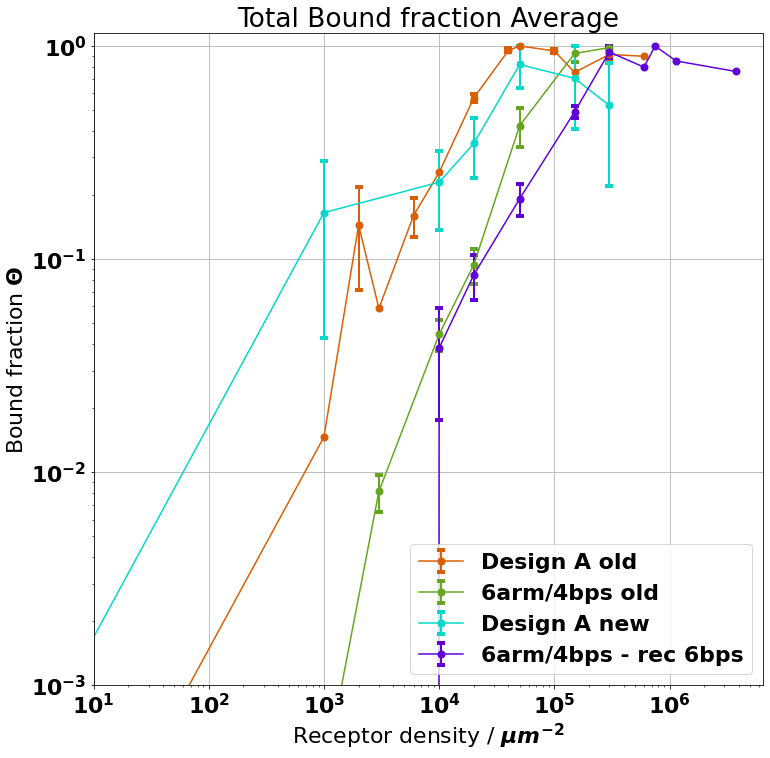

In [39]:
fig = plt.figure(figsize=(12, 12))
#plt.errorbar(df_6_10n.recept_,df_6_10n.Mean_Intensity_norm_max_mean, yerr=df_6_10n.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_10n.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#e7298a',label = 'ACTTCT, 10n')
plt.errorbar(df_6_6n.recept_,df_6_6n.Mean_Intensity_norm_max_mean, yerr=df_6_6n.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_6n.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#d95f02',label = 'Design A old')
plt.errorbar(df_4_6n.recept_,df_4_6n.Mean_Intensity_norm_max_mean, yerr=df_4_6n.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_4bp_6n.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#66a61e',label = '6arm/4bps old')
#plt.errorbar(df_int_6bp_6n_DA.recept_,df_int_6bp_6n_DA.Mean_Intensity_norm_max_mean, yerr=df_int_6bp_6n_DA.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_6n_DA.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#7570b3',label = 'Design A new')
#plt.errorbar(df_0_6n.recept_,df_0_6n.Mean_Intensity_norm_max_mean, yerr=df_0_6n.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_0bp_6n.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='black',label = 'None, 6n')
plt.errorbar(df_int_6_DA.recept_,df_int_6_DA.Mean_Intensity_norm_max_mean, yerr=df_int_6_DA.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_6n_DA.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#02d9cb',label = 'Design A new')

plt.errorbar(df_6_6nC.recept_,df_6_6nC.Mean_Intensity_norm_max_mean, yerr=df_6_6nC.Mean_Intensity_norm_max_std/np.sqrt(len(df_int_6bp_6nC.date)/7), fmt='o-', markersize = 7, capthick=4,elinewidth = 2, capsize = 4, color='#5f02d9',label = '6arm/4bps - rec 6bps')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3,1.15)
plt.xlim(10,6500000)
plt.xlabel('Receptor density / $\\mu m^{-2}$')
plt.ylabel('Bound fraction $\\Theta$')
plt.title("Total Bound fraction Average")
plt.grid()
plt.legend()
#name = '6bp_10n_6n_3n_1n_mean_adsorption.eps'
#plt.savefig((os.path.join(path + 'eps', name)), format='eps')
plt.show()